# Gráficas (más) complejas con `Matplotlib`

Hasta este momento, es probable que no sepas usar muchos más comandos que `plot()`, `xlim()`, `xlabel()`, `title()` y `xscale()`. También es probabable que hayas buscado cómo hacer algo más sofisticado, y hayas encontrado montones de ejemplos bastante incomprensibles, que además están hechos para usarse en **Python**. 

La buena noticia es que si se puede hacer en **Python** se puede hacer en **Julia** cambiando a lo mucho cuatro cositas. Las primeras dos son muy fáciles, sólo tienen que ver con cambiar la sintáxis de **Python** por la de **Julia**:

- Cambia las comillas simples de **Python** (ejemplo, en la documentación encuentras `color='black'`) por comillas dobles (se convierte en `color = "black"`).

- Cambia las mayúsculas de las variables booleaneas por minúsculas (`normed = True` se coonvierte en `normed = true`).

La tercera es un poco más complicada, y necesitamos algo de contexto. Tanto **Python** como **Julia** son lenguajes orientados a objetos. (Aunque **Julia** es un poco raro, hay discusión al respecto.) 

No vamos a entrar en muchos detalles, pero esto quiere decir que tengo "objetos", unas cosas abstractas que en su interior agrupan variables, que llamamos atributos, y funciones, que se llaman métodos. (Justo este es la parte rara de **Julia**, los métodos son externos a los objetos.) Los objetos son instancias, materializaciones concretas, de una clase o de un tipo, que dicen en general cómo van a ser todos mis objetos.

Poco más abajo vamos a dar ejemplos. Vamos a ver que por ejemplo una figura es un objeto, los ejes son objetos, y ambos están contenidos en un objeto subplot.

Vamos a suponer por un instante que estamos en **Python**. Si yo tengo un objeto `mi_objeto`, puedo acceder a sus atributos y métodos con la notación:

```python
mi_objeto.atributo
mi_objeto.metodo()
```

Por ejemplo, tal vez recuerden cómo se hacía crecer un lista con el método `append()`:

```python
lista = [1,2,3]
lista.append(10)
```

En **Julia** los métodos no son parte del objeto, y por eso paso el arreglo como argumento a `push!()`.

Cuando en **Julia** escribo `using PyPlot`, estoy usando la biblioteca `matplotlib.pyplot` que en realidad funciona con código en **Python**. El código de **Julia** se traduce automáticamente a código de **Python** y casi todo funciona bien, excepto acceder a los métodos de las funciones. 

`PyPlot` utiliza otro paquete que se llama `PyCall` que es el que hace la traducción. Cuando quiero usar los métodos de un objeto que vive en **Python**, necesito primero llamar a `PyCall` y escribir

```julia
mi_objeto[:metodo]()
```

Y ahora sí llegamos a la tercera modificación. Si en la documentación encuentro métodos a los que accedo con un punto al final de mi objeto, tengo que cambiarlos por corchetes y dos puntos. `figure.gca().axes.get_xaxis()` en **Python** se convierte en **Julia** en 

```julia
figure[:gca]()[:axes][:get_xaxis]()
```

La cuarta y última modificación es bastante trivial. En **Python** generalmente importo las funciones para graficar de la siguiente manera:

```python
import matplotlib.pyplot as plt
```

Por lo tanto cuando quiero usar la función `plot()` tengo que decirle que es parte del paquete que acabo de importar:

```python
plt.plot(mis_datosX, mis_datosY) 
```

En **Julia** el comando `using PyPlot` ya cargó los nombre de todas las funciones, y por eso sólo le tengo que decir `plot(mis_datosX, mis_datosY)`. Así que si en la documentación encuentras alguna función que se llama con `plt.`, en **Julia** no lo tienes que escribir.

# Algunos ejemplos sencillos

In [1]:
using PyPlot
using PyCall # No olvides llamar a PyCall !

## Supongamos que quiero quitar la escala de los ejes

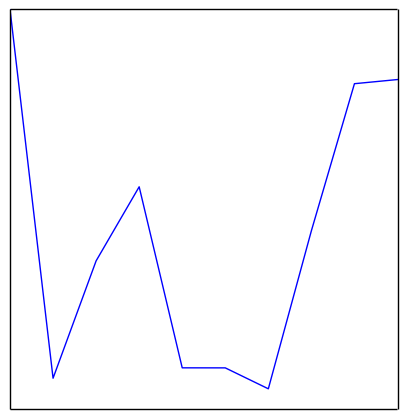

In [2]:
fig = figure(figsize=(5,5))
axes = fig[:gca]()[:axes]
axes[:get_xaxis]()[:set_visible](false)
axes[:get_yaxis]()[:set_visible](false)
plot(rand(10))
show()

## Subplots

### `figure()` es el objeto figura, y le puedo agregar los ejes con `add_axes()`

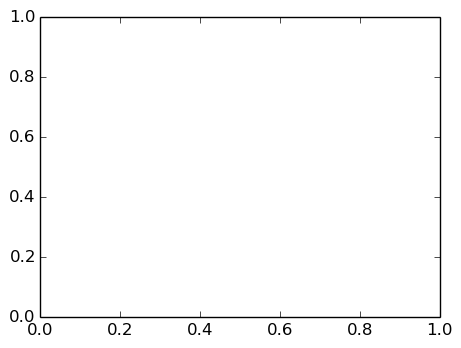

In [4]:
fig = figure()
fig[:add_axes]([0,0, 0.5, 0.5])
show()

### Puedo hacer lo mismo con `subplots()`, pero ...

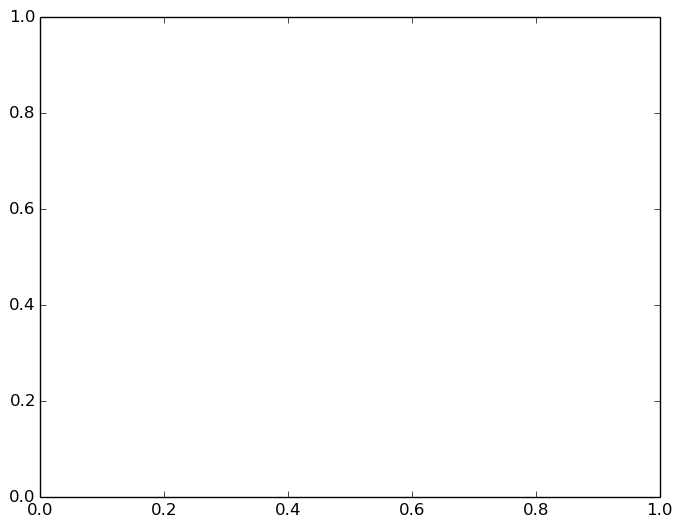

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f4b03d49810>),PyObject <matplotlib.axes.AxesSubplot object at 0x7f4b03d75550>)

In [5]:
fig, ax = subplots(1, 1)

### ... es más general, porque cambiando el agumento genero varias gráficas.

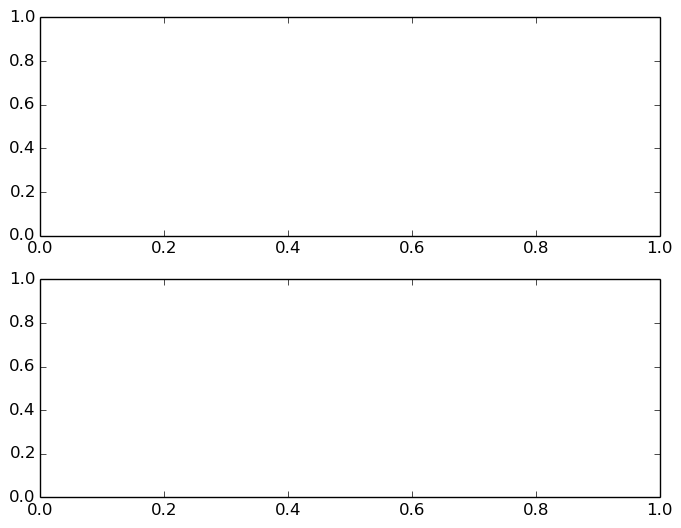

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f4b03ae7110>),[PyObject <matplotlib.axes.AxesSubplot object at 0x7f4b10037a50>,PyObject <matplotlib.axes.AxesSubplot object at 0x7f4b030e7510>])

In [6]:
fig, (ax1, ax2) = subplots(2, 1)

### Notemos que cada el `Out` de la celda anterior da objetos.

In [7]:
ax1

PyObject <matplotlib.axes.AxesSubplot object at 0x7f4b10037a50>

In [8]:
ax2

PyObject <matplotlib.axes.AxesSubplot object at 0x7f4b030e7510>

### Puedo graficar cosas distintas, llamando plot en cada objeto de `axes`.

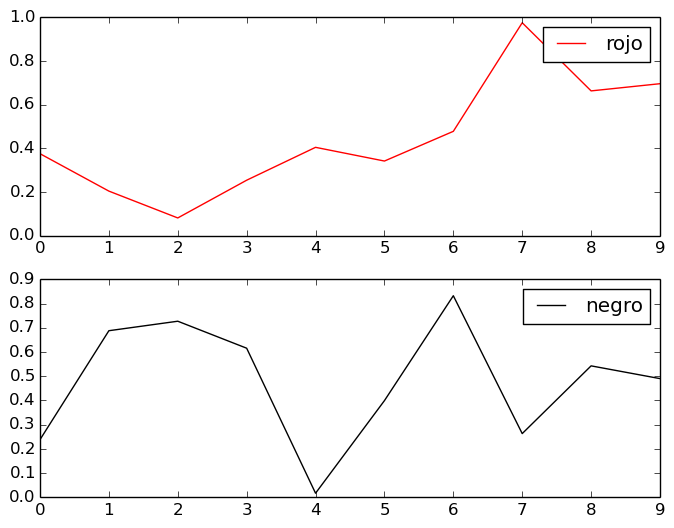

In [10]:
fig, (ax1, ax2) = subplots(2, 1)
ax1[:plot](rand(10), "r", label="rojo")
ax2[:plot](rand(10), "k", label="negro")
ax1[:legend]()
ax2[:legend]()
show()

## Histogramas

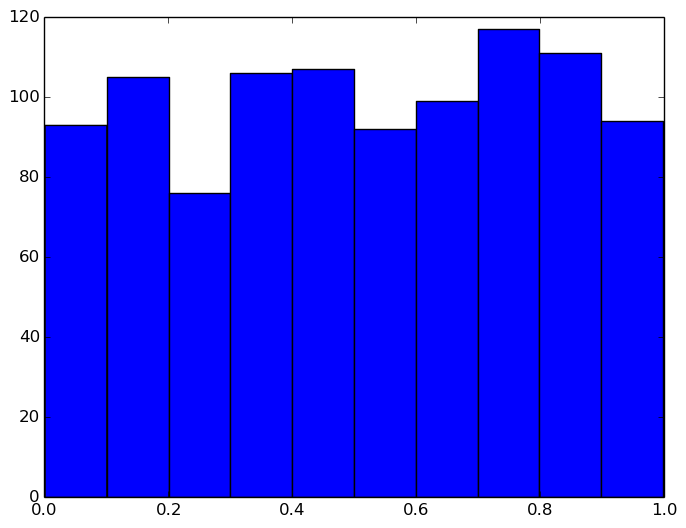

([93.0,105.0,76.0,106.0,107.0,92.0,99.0,117.0,111.0,94.0],[0.0010388948616406601,0.10069969116342396,0.20036048746520727,0.30002128376699055,0.39968208006877387,0.4993428763705572,0.5990036726723404,0.6986644689741238,0.7983252652759071,0.8979860615776903,0.9976468578794737],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f4b02ef1810>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02ef1e50>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02efe510>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02efeb90>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02e8b250>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02e8b8d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02e8bf50>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02e97610>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02e97c90>,PyObject <matplotlib.patches.Rectangle object at 0x7f4b02ea3350>])

In [11]:
n, bins, patches = plt[:hist](rand(1000))

### Los primeros argumentos que escupe `hist()` son las cuentas del histograma...

In [72]:
n

10-element Array{Float64,1}:
 122.0
  75.0
 120.0
  89.0
  94.0
  95.0
 103.0
 105.0
 103.0
  94.0

### ... y la posición de cada caja.

In [73]:
bins

11-element Array{Float64,1}:
 0.000423828
 0.100331   
 0.200238   
 0.300144   
 0.400051   
 0.499958   
 0.599865   
 0.699772   
 0.799679   
 0.899586   
 0.999492   

### Lo demás son los objetos rectangulos que se grafican:

In [58]:
patches

10-element Array{Any,1}:
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b55c490>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b57ed90>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b57e150>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b51d410>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b51d190>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b658510>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b658e10>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b5c1710>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b5c1990>
 PyObject <matplotlib.patches.Rectangle object at 0x7fcc3b5b8350>

### Cambiando los argumentos, puedo hacer cosas más complicadas.

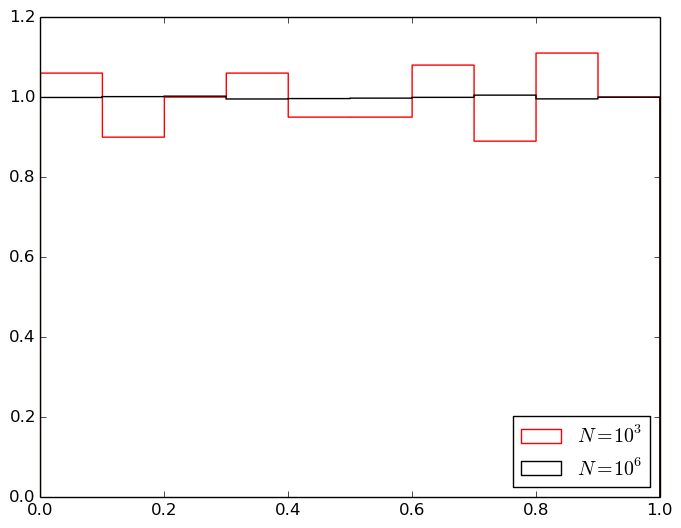

In [13]:
plt[:hist](rand(1000), normed=true, histtype="step", color="r", label=L"N = 10^3")
plt[:hist](rand(1000000), normed=true, histtype="step", color="k", label=L"N = 10^6")
legend(loc=4)
show()